In [7]:
# 4 classes
import numpy as np

#load numpy binaries
pos = np.load('/home/toyonaga/scratch/HSTLens_datasets/batchjob_3_pos.npy')
neg = np.load('/home/toyonaga/scratch/HSTLens_datasets/batchjob_3_neg.npy')
crowded = np.load('/home/toyonaga/scratch/HSTLens_datasets/batchjob_3_crowded.npy')
multisource = np.load('/home/toyonaga/scratch/HSTLens_datasets/batchjob_3_multisource.npy')

#one-hot-encode
py =np.ones((pos.shape[0],4))
for i in range(py.shape[0]): py[i] =[1,0,0,0]
ny =np.ones((neg.shape[0],4))
for i in range(ny.shape[0]): ny[i] =[0,1,0,0]
cy =np.ones((pos.shape[0],4))
for i in range(cy.shape[0]): cy[i] =[0,0,1,0]
my =np.ones((neg.shape[0],4))
for i in range(my.shape[0]): my[i] =[0,0,0,1]

#concat the data sets into features and labels
x_combined =np.concatenate((pos, neg, crowded, multisource))
y_combined =np.concatenate((py, ny, cy, my)) 

#shuffle the data sets
s3 = np.arange(x_combined.shape[0])
np.random.shuffle(s3)
x_combined_shuf =x_combined[s3]
y_combined_shuf = y_combined[s3]

In [6]:
# 3 classes

import numpy as np

#load numpy binaries
pos = np.load('/home/toyonaga/scratch/HSTLens_datasets/batchjob_3_pos.npy')
neg = np.load('/home/toyonaga/scratch/HSTLens_datasets/batchjob_3_neg.npy')
crowded = np.load('/home/toyonaga/scratch/HSTLens_datasets/batchjob_3_crowded.npy')
# multisource = np.load('/home/toyonaga/scratch/HSTLens_datasets/batchjob_3_multisource.npy')

#one-hot-encode
py =np.ones((pos.shape[0],3))
for i in range(py.shape[0]): py[i] =[1,0,0]
ny =np.ones((neg.shape[0],3))
for i in range(ny.shape[0]): ny[i] =[0,1,0]
cy =np.ones((pos.shape[0],3))
for i in range(cy.shape[0]): cy[i] =[0,0,1]
my =np.ones((neg.shape[0],3))
for i in range(my.shape[0]): my[i] =[0,0,1]

#concat the data sets into features and labels
x_combined =np.concatenate((pos, neg, crowded))#, multisource))
y_combined =np.concatenate((py, ny, cy))#, my)) 

#shuffle the data sets
s3 = np.arange(x_combined.shape[0])
np.random.shuffle(s3)
x_combined_shuf =x_combined[s3]
y_combined_shuf = y_combined[s3]

In [18]:
x_combined.shape

(57584, 1, 100, 100)

In [51]:
from HSTLens_resnet16_s_multiclass_6 import deeplens_classifier

my_model = deeplens_classifier(n_epochs=100, batch_size=32)
my_model._build() 

my_model._fit(x_combined_shuf[:50000],y_combined_shuf[:50000])

#my_model.model.save("real_lenses_weights") # issue with json serializing
my_model.model.save_weights("combined_nonsubtracted_weights_resnet16_s_h4_4_3rdrun")
# my_model.model.load_weights("combined_nonsubtracted_weights_resnet16_s_h4_4")


building 4 classes 
(?, 1, 100, 100)
multiclass_2
pre- resnet block entered!
resnet16 blocks
kernel= 5
shorcut (?, 32, 50, 50) net (?, 32, 50, 50)
pre- resnet block entered!
resnet16 blocks
kernel= 3
shorcut (?, 32, 25, 25) net (?, 32, 25, 25)
pre- resnet block entered!
resnet16 blocks
kernel= 3
shorcut (?, 64, 12, 12) net (?, 64, 12, 12)
pre- resnet block entered!
resnet16 blocks
kernel= 3
shorcut (?, 64, 6, 6) net (?, 64, 6, 6)
pre- resnet block entered!
resnet16 blocks
kernel= 3
shorcut (?, 128, 6, 6) net (?, 128, 6, 6)
pre- resnet block entered!
resnet16 blocks
kernel= 3
shorcut (?, 128, 6, 6) net (?, 128, 6, 6)
...Fitting model ...
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
step decay entered. Learning rate: 0.001
40000/40000 [==============================] - 82s 2ms/step - loss: 0.5279 - acc: 0.8232 - val_loss: 1.7916 - val_acc: 0.6726
Epoch 2/100
step decay entered. Learning rate: 0.001
40000/40000 [==============================] - 71s 2ms/step - loss: 0.320

[0. 0. 0. 1.]


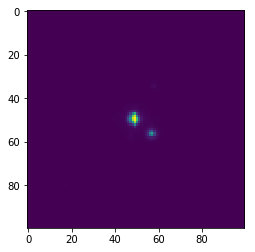

curr num 791next=1, exit=0 0


In [5]:
 #quickly view some images
import matplotlib.pyplot as plt
from IPython import display
import os

ims = x_combined_shuf
y = y_combined_shuf

print(len(ims))
sp=int(input("start position"))


for i in range(len(ims)):
    exit=False
    display.clear_output(wait=True)
    plt.imshow(ims[i+sp][0]) 
    print(y[i+sp])
    plt.pause(0.01)
    plt.show()
    while(1):      
        ans = int(input("curr num "+str(i+sp)+"next=1, exit=0"))
        if ans ==1: 
            break
        if ans==0:
            exit=True
            break
    if exit==True:
        break

In [7]:
(my_model.batch_history.epoch_losses) 

[0.745, 0.76, 0.75, 0.82, 0.86, 0.855, 0.825, 0.875, 0.875, 0.9]

In [16]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
# x_combined_roc = np.concatenate((ims_shuf[10000:], ims_real_test))
# y_combined_roc = np.concatenate((y_shuf[10000:], y_real_test))
fpr, tpr, t=my_model.eval_ROC(x_combined_shuf[50000:],y_combined_shuf[50000:])
print("auc "+str( metrics.auc(fpr, tpr)))

plt.title('4 classes')
plt.plot(fpr,tpr)
plt.xlabel('FPR'); 
plt.ylabel('TPR')
plt.xlim(0,0.4); 
plt.ylim(0.8,1)
plt.grid('on')

ValueError: multilabel-indicator format is not supported

/project/6016730/mlhaa/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


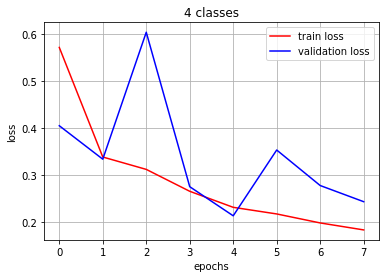

In [32]:
#my_model.model.history is a callback obj my_model.model.history is a dict
train_loss = my_model.model.history.history['loss'] 
val_loss = my_model.model.history.history['val_loss']
xc = range(8)

plt.figure()
plt.title('4 classes')
plt.xlabel('epochs');
plt.ylabel('loss')
plt.plot(xc, train_loss,'r-',label="train loss")
plt.plot(xc, val_loss, 'b-',label="validation loss")
plt.grid('on')
plt.legend()

In [671]:
start = time.time()
predictions= my_model._predict(x[:1000],y[:1000])
duration = time.time()-start
print(duration)

''' 
12.427s for 100 predictions
1.28s for 10 predicitons
97.0560390949 for 1000 predictions 
'''

NameError: name 'x' is not defined

/project/6016730/mlhaa/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


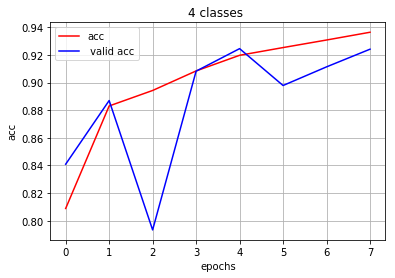

In [34]:
import matplotlib.pyplot as plt
acc = my_model.model.history.history['acc'] 
val_acc = my_model.model.history.history['val_acc'] 
xc =range(8)
plt.figure()
plt.title('4 classes ')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(xc, acc,'r-',label="acc")
plt.plot(xc, val_acc,'b-',label=" valid acc")
plt.grid('on')
plt.legend()

In [674]:
x_test = np.load('pos_real_nonskysubtracted_x1.npy')
y_test = np.load('pos_real_nonskysubtracted_y1.npy')
x_test.shape

(420, 1, 100, 100)

(1200, 1, 100, 100)
[1.]


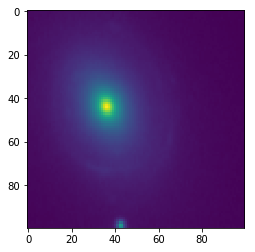

In [53]:
i = 1183

print( ims_real_test.shape)
plt.imshow(ims_real_test[i][0])
print(y_real_test[i])

In [13]:
#load the real TEST images and their negatives
import os
from astropy.io import fits
import numpy as np
from sklearn.preprocessing import minmax_scale
from random import shuffle

NEG_PATH = "/home/toyonaga/scratch/augmented_reals_3/dim_negs_norm_aug_noskysubtract/"
#POS_PATH = "/home/roberttoyonaga/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/non-neg-set/merged/"
POS_PATH = "/home/toyonaga/scratch/augmented_reals_3/augmented_reals_separate_test/"
set_size =15*40*2  #includes both pos and neg samples

ims_real_test = np.ones((set_size, 1, 100, 100))
y_real_test = np.ones((set_size,1))

c_sig=10

#load the negatives into even numbered indices (including 0)
count =0
neg_list = os.listdir(NEG_PATH)
shuffle(neg_list)
for filename in neg_list:
    if filename.endswith(".fits") and count<set_size/2: 
        pic = fits.open(NEG_PATH+filename)[0].data
    
            
        c = np.nan_to_num(pic)
        sky_c =3.*np.median(pic)- 2.*np.mean(pic) #calc sky
        sigma_c= np.std(c)          #calc sigma
        c[np.isnan(c)]=sky_c          #get rid of NAn
        c[c>(sky_c+c_sig*sigma_c)]=sky_c+c_sig*sigma_c    #clip values
        c= c-sky_c                                         #subtract sky
        tmp_lens2 = c.reshape(-1,)                        #scale 

        tmp_lens2 = minmax_scale(tmp_lens2, feature_range = (0,1))
        pic = tmp_lens2.reshape(pic.shape[2],pic.shape[2])


        summed=pic
        np.random.seed()
        h1 = (sky_c)*np.random.randn(10000)
        np.random.shuffle(h1)
        summed = np.add(summed,h1.reshape(100,100)) # you can add constants too
        tmp_image = summed.reshape(-1,)
        tmp_image = minmax_scale(tmp_image, feature_range = (0,1))
        summed = tmp_image.reshape(summed.shape[0],summed.shape[1])
        ims_real_test[count*2] = summed
        y_real_test[count*2] = np.array([0])
        count+=1
    
    
#load the positives into odd numered indices
count =0
pos_list = os.listdir(POS_PATH)
shuffle(pos_list)
for filename in pos_list:
    if filename.endswith(".fits") and count<set_size/2: 
        pic = fits.open(POS_PATH+filename)[0].data
        
          
        c = np.nan_to_num(pic)
        sky_c =3.*np.median(pic)- 2.*np.mean(pic) #calc sky
        sigma_c= np.std(c)          #calc sigma
        c[np.isnan(c)]=sky_c          #get rid of NAn
        c[c>(sky_c+c_sig*sigma_c)]=sky_c+c_sig*sigma_c    #clip values
        c= c-sky_c                                         #subtract sky
        tmp_lens2 = c.reshape(-1,)                        #scale 

        tmp_lens2 = minmax_scale(tmp_lens2, feature_range = (0,1))
        pic = tmp_lens2.reshape(pic.shape[2],pic.shape[2])


        summed=pic
        np.random.seed()
        h1 = (sky_c)*np.random.randn(10000)
        np.random.shuffle(h1)
        summed = np.add(summed,h1.reshape(100,100)) # you can add constants too
        tmp_image = summed.reshape(-1,)
        tmp_image = minmax_scale(tmp_image, feature_range = (0,1))
        summed = tmp_image.reshape(summed.shape[0],summed.shape[1])
        ims_real_test[count*2+1] = summed
        y_real_test[count*2+1] = np.array([1])
        count+=1
        

          

In [48]:
#true_pred
# predictions  = my_model._predict( x_combined_shuf[50000:], y= None, discrete = False)
y=y_combined_shuf[50000:]
p_p=0
p_n=0
m_c=0
c_m=0
m_n=0
n_m=0
fp=0
fn=0
tp=0
c_n=0
n_c=0
c_c=0
for i in range(len(predictions)):
    if (np.argmax(predictions[i])==0) and (y[i].all()==np.array([1,0,0,0]).all()):
        p_p+=1
    if (np.argmax(predictions[i])==1) and (y[i].all()==np.array([0,0,1,0]).all()):
        c_n+=1
    if (np.argmax(predictions[i])==2) and (y[i].all()==np.array([0,1,0,0]).all()):
        n_c+=1
    if (np.argmax(predictions[i])==2) and (y[i].all()==np.array([0,0,1,0]).all()):
        c_c+=1
    if (np.argmax(predictions[i])==1) and (y[i].all()==np.array([1,0,0,0]).all()):
        p_n+=1
    if (np.argmax(predictions[i])==2) and (y[i].all()==np.array([0,0,0,1]).all()):
        m_c+=1
    if (np.argmax(predictions[i])==3) and (y[i].all()==np.array([0,0,1,0]).all()):
        c_m+=1
    if (np.argmax(predictions[i])==1) and (y[i].all()==np.array([0,0,0,1]).all()):
        m_n+=1
    if (np.argmax(predictions[i])==3) and (y[i].all()==np.array([0,1,0,0]).all()):
        n_m+=1
    if (np.argmax(predictions[i])==0) and (y[i].all()!=np.array([1,0,0,0]).all()): 
        fp+=1 #if predicted lens and not lens
    if (np.argmax(predictions[i])!=0) and (y[i].all()==np.array([1,0,0,0]).all()): 
        fn+=1  #if predicted not a lens and is a lens
    if (y[i].all()==np.array([1,0,0,0]).all()):
        tp+=1                                    #if truly is a lens
        

In [50]:
pur = tp / ( tp + fp )
comp= tp / ( tp + fn )
print('purity: '+str(pur)+' compl: '+str(comp))
print('p_p '+str(p_p)+' p_n '+ str(p_n)+' m_c '+str(m_c)+" c_n "+str(c_n)+" n_c "+str(n_c)+' c_m '+
      str(c_m)+' m_n '+str(m_n)+' n_m '+str(n_m)+' fp '+str(fp)+' fn '+str(fn)+ ' tp ' +str(tp)+
     ' c_c '+str(c_c))
    

purity: 1.0 compl: 0.5715146948003015
p_p 1898 p_n 1888 m_c 1871 c_n 1888 n_c 1871 c_m 1927 m_n 1888 n_m 1927 fp 0 fn 5686 tp 7584 c_c 1871


In [31]:
pos_prbs =np.zeros((1,len(predictions)))
neg_prbs =np.zeros((1,len(predictions)))
crowded_prbs =np.zeros((1,len(predictions)))
multisource_prbs =np.zeros((1,len(predictions)))
 
for i in range(len(predictions)):


SyntaxError: unexpected EOF while parsing (<ipython-input-31-ea28d337934b>, line 6)